## Chapter9P Input/Output operations

In [1]:
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
import pickle
import numpy as np
from random import gauss


In [3]:
a = [gauss(1.5, 2) for i in range(1000000)]

In [4]:
path = '/Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/'

In [5]:
pkl_file = open(path+ 'data.pkl', 'wb')

In [6]:
%time pickle.dump(a, pkl_file)

CPU times: user 5.68 ms, sys: 2.01 ms, total: 7.69 ms
Wall time: 7.29 ms


In [7]:
pkl_file.close()

In [8]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff   9003247 Jan 12 13:06 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/data.pkl
-rw-r--r--  1 youngsoom4pro  staff  52633600 Jan 12 12:54 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.db


In [9]:
pkl_file = open(path + 'data.pkl', 'rb')
# open the file for reading in binary mode(rb)

In [10]:
%time b = pickle.load(pkl_file)
# read the object from disk and deserializes it.

CPU times: user 10.7 ms, sys: 3.61 ms, total: 14.3 ms
Wall time: 13.7 ms


In [11]:
a[:3]

[2.287377677877315, 5.027854123518985, 2.609357358927312]

In [12]:
b[:3]

[2.287377677877315, 5.027854123518985, 2.609357358927312]

In [13]:
np.allclose(np.array(a), np.array(b))
# converting a and b to ndarray objects, np.allclose() verifies that both contain the same data (numbers)

True

In [14]:
pkl_file = open(path + 'data.pkl', 'wb')

In [15]:
%time pickle.dump(np.array(a), pkl_file)

CPU times: user 13.8 ms, sys: 1.28 ms, total: 15.1 ms
Wall time: 14.5 ms


In [16]:
%time pickle.dump(np.array(a)**2, pkl_file)

CPU times: user 13.4 ms, sys: 1.5 ms, total: 14.9 ms
Wall time: 14.2 ms


In [17]:
pkl_file.close()

In [18]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  16000326 Jan 12 13:06 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/data.pkl
-rw-r--r--  1 youngsoom4pro  staff  52633600 Jan 12 12:54 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.db


In [19]:
pkl_file = open(path+'data.pkl', 'rb')

In [20]:
x= pickle.load(pkl_file)
x[:4]

array([ 2.28737768,  5.02785412,  2.60935736, -0.51251064])

In [21]:
y= pickle.load(pkl_file)
y[:4]

array([ 5.23209664, 25.27931709,  6.80874583,  0.26266715])

In [22]:
pkl_file.close()

In [23]:
pkl_file = open(path + 'data.pkl', 'wb')
pickle.dump({'x': x, 'y': y}, pkl_file) # stor a dict object containing the two ndarray objects. 
pkl_file.close()

In [24]:
pkl_file = open(path + 'data.pkl', 'rb')
data = pickle.load(pkl_file) # retrivevs the dict object
pkl_file.close()
for key in data.keys():
    print(key, data[key][:4])

x [ 2.28737768  5.02785412  2.60935736 -0.51251064]
y [ 5.23209664 25.27931709  6.80874583  0.26266715]


In [25]:
!rm -f $path*

In [26]:
import pandas as pd

In [27]:
rows = 5000
a = np.random.standard_normal((rows,5)).round(4)

In [28]:
a

array([[ 1.3276,  0.7749,  0.732 ,  0.3168, -2.0596],
       [-0.0498, -0.1662, -1.8669,  0.1585, -0.0924],
       [ 1.012 ,  0.719 ,  1.0896, -0.1169,  0.5678],
       ...,
       [-0.6249, -0.6211, -1.1279,  0.3832, -0.2796],
       [ 0.1483, -0.1311,  0.9052, -0.4103, -0.1078],
       [-1.231 ,  0.039 , -0.1834, -0.304 ,  1.5437]], shape=(5000, 5))

In [29]:
t = pd.date_range(start='2019/1/1', periods=rows, freq='h')

In [30]:
t

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-07-27 22:00:00', '2019-07-27 23:00:00',
               '2019-07-28 00:00:00', '2019-07-28 01:00:00',
               '2019-07-28 02:00:00', '2019-07-28 03:00:00',
               '2019-07-28 04:00:00', '2019-07-28 05:00:00',
               '2019-07-28 06:00:00', '2019-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='h')

In [31]:
csv_file = open(path+'data.csv','w')

In [32]:
header = 'date,no1,no2,no3,no4,no5\n'
# opens a file for writing (w)

In [33]:
csv_file.write(header)
# define the header row (column labels) and writes it as the first line.

25

In [34]:
for t_, (no1, no2, no3, no4, no5) in zip(t,a):
    s = '{},{},{},{},{},{}\n'.format(t_, no1, no2, no3, no4, no5)
    csv_file.write(s)

In [35]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  279576 Jan 12 13:06 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/data.csv


In [36]:
csv_file = open (path+'data.csv', 'r')

In [37]:
for i in range(5):
    print(csv_file.readline(), end='')

date,no1,no2,no3,no4,no5
2019-01-01 00:00:00,1.3276,0.7749,0.732,0.3168,-2.0596
2019-01-01 01:00:00,-0.0498,-0.1662,-1.8669,0.1585,-0.0924
2019-01-01 02:00:00,1.012,0.719,1.0896,-0.1169,0.5678
2019-01-01 03:00:00,-0.0907,-1.0035,-0.8154,-0.6048,-1.8839


In [38]:
csv_file.close()

In [39]:
csv_file = open(path + 'data.csv', 'r')

In [40]:
content = csv_file.readlines()

In [41]:
content[:5]

['date,no1,no2,no3,no4,no5\n',
 '2019-01-01 00:00:00,1.3276,0.7749,0.732,0.3168,-2.0596\n',
 '2019-01-01 01:00:00,-0.0498,-0.1662,-1.8669,0.1585,-0.0924\n',
 '2019-01-01 02:00:00,1.012,0.719,1.0896,-0.1169,0.5678\n',
 '2019-01-01 03:00:00,-0.0907,-1.0035,-0.8154,-0.6048,-1.8839\n']

In [42]:
csv_file.close()

In [43]:
import csv
csv.field_size_limit(100000000)

131072

In [44]:
with open(path + 'data.csv', 'r') as f:
    csv_reader = csv.reader(f)
    lines = [line for line in csv_reader]

In [45]:
lines[:5]

[['date', 'no1', 'no2', 'no3', 'no4', 'no5'],
 ['2019-01-01 00:00:00', '1.3276', '0.7749', '0.732', '0.3168', '-2.0596'],
 ['2019-01-01 01:00:00', '-0.0498', '-0.1662', '-1.8669', '0.1585', '-0.0924'],
 ['2019-01-01 02:00:00', '1.012', '0.719', '1.0896', '-0.1169', '0.5678'],
 ['2019-01-01 03:00:00',
  '-0.0907',
  '-1.0035',
  '-0.8154',
  '-0.6048',
  '-1.8839']]

In [46]:
with open(path+'data.csv','r') as f:
    csv_reader = csv.DictReader(f)
    lines = [line for line in csv_reader]

In [47]:
lines[:3]

[{'date': '2019-01-01 00:00:00',
  'no1': '1.3276',
  'no2': '0.7749',
  'no3': '0.732',
  'no4': '0.3168',
  'no5': '-2.0596'},
 {'date': '2019-01-01 01:00:00',
  'no1': '-0.0498',
  'no2': '-0.1662',
  'no3': '-1.8669',
  'no4': '0.1585',
  'no5': '-0.0924'},
 {'date': '2019-01-01 02:00:00',
  'no1': '1.012',
  'no2': '0.719',
  'no3': '1.0896',
  'no4': '-0.1169',
  'no5': '0.5678'}]

In [48]:
!rm -f $path*

In [49]:
import sqlite3 as sq3

In [50]:
con = sq3.connect(path+'numbs.db')
# open database connection; a file is created if it does not exist

In [51]:
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'
# A SQL query that creates a table with three columns

In [52]:
con.execute(query)
# executes the query


In [53]:
con.commit()
# and commits the changes

In [54]:
q = con.execute
# defines a short alias for the con.execute() method

In [55]:
q('SELECT * FROM sqlite_master').fetchall()
# fetches metainformation about the database, showing the just-created table as the single object.

[('table',
  'numbs',
  'numbs',
  2,
  'CREATE TABLE numbs (Date date, No1 real, No2 real)')]

In [56]:
import datetime

In [57]:
now = datetime.datetime.now()
q('INSERT INTO numbs VALUES(?,?,?)', (now, 0.12, 7.3))

/var/folders/ff/0rjbdk056r39pjbd0rm8g6440000gn/T/ipykernel_21812/3105697824.py:2: DeprecationWarning: The default datetime adapter is deprecated as of Python 3.12; see the sqlite3 documentation for suggested replacement recipes
  q('INSERT INTO numbs VALUES(?,?,?)', (now, 0.12, 7.3))


In [58]:
# writes a single row (or record) to the numbs table.
np.random.seed(100)

In [59]:
# create a larger dummy data set as an ndarray object
data = np.random.standard_normal((10000,2)).round(4)

In [60]:
%%time
# iterate over the rows of the ndarray object.
for row in data:
    now = datetime.datetime.now()
    q('INSERT INTO numbs VALUES(?,?,?)', (now, row[0], row[1]))
con.commit()
    

CPU times: user 16.6 ms, sys: 1.5 ms, total: 18.1 ms
Wall time: 17.7 ms


<timed exec>:4: DeprecationWarning: The default datetime adapter is deprecated as of Python 3.12; see the sqlite3 documentation for suggested replacement recipes


In [61]:
# Retrieves a number of rows from the table
q('SELECT * FROM numbs').fetchmany(4)

[('2026-01-12 13:06:56.718517', 0.12, 7.3),
 ('2026-01-12 13:06:56.728341', -1.7498, 0.3427),
 ('2026-01-12 13:06:56.728613', 1.153, -0.2524),
 ('2026-01-12 13:06:56.728665', 0.9813, 0.5142)]

In [62]:
q('SELECT * FROM numbs WHERE no1>0.5').fetchmany(4)

[('2026-01-12 13:06:56.728613', 1.153, -0.2524),
 ('2026-01-12 13:06:56.728665', 0.9813, 0.5142),
 ('2026-01-12 13:06:56.728843', 0.6727, -0.1044),
 ('2026-01-12 13:06:56.728900', 1.619, 1.5416)]

In [63]:
# define pointer object
pointer = q('SELECT * FROM numbs')

In [64]:
# ... that behaves like a generator object
for i in range(3):
    print(pointer.fetchone())

('2026-01-12 13:06:56.718517', 0.12, 7.3)
('2026-01-12 13:06:56.728341', -1.7498, 0.3427)
('2026-01-12 13:06:56.728613', 1.153, -0.2524)


In [65]:
# retrives all the remaining rows.
rows = pointer.fetchall()
rows[:3]

[('2026-01-12 13:06:56.728665', 0.9813, 0.5142),
 ('2026-01-12 13:06:56.728672', 0.2212, -1.07),
 ('2026-01-12 13:06:56.728689', -0.1895, 0.255)]

In [66]:
q('DROP TABLE IF EXISTS numbs')
#removes the table from database.

In [67]:
q('SELECT * FROM sqlite_master').fetchall()

[]

In [68]:
con.close()

In [69]:
!rm -f $path*

In [70]:
dtimes = np.arange('2019-01-01 10:00:00', '2025-12-31 22:00:00', dtype='datetime64[m]')

In [71]:
len(dtimes)

3681360

In [72]:
dty = np.dtype([('Date', 'datetime64[m]'),('No1','f'),('No2','f')])

In [73]:
data = np.zeros(len(dtimes), dtype=dty)

In [74]:
data['Date'] = dtimes
# populate data column

In [75]:
a = np.random.standard_normal((len(dtimes),2)).round(4)
# The dummy datasets

In [76]:
data['No1']= a[:,0]
data['No2'] = a[:,1]
#.. which populate the No1 and No2 columns

In [77]:
data.nbytes

58901760

In [78]:
%time np.save(path+'array', data)

CPU times: user 258 μs, sys: 5.12 ms, total: 5.38 ms
Wall time: 5.81 ms


In [79]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  58901952 Jan 12 13:06 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/array.npy


In [80]:
%time np.load(path+'array.npy')

CPU times: user 399 μs, sys: 6.38 ms, total: 6.78 ms
Wall time: 6.07 ms


array([('2019-01-01T10:00',  1.5131,  0.6973),
       ('2019-01-01T10:01', -1.722 , -0.4815),
       ('2019-01-01T10:02',  0.8251,  0.3019), ...,
       ('2025-12-31T21:57',  1.372 ,  0.6446),
       ('2025-12-31T21:58', -1.2542,  0.1612),
       ('2025-12-31T21:59', -1.1997, -1.097 )],
      shape=(3681360,), dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [81]:
%time data = np.random.standard_normal((10000,6000)).round(4)

CPU times: user 558 ms, sys: 72.8 ms, total: 631 ms
Wall time: 633 ms


In [82]:
data.nbytes

480000000

In [83]:
%time np.save(path+'array', data)

CPU times: user 305 μs, sys: 45.2 ms, total: 45.5 ms
Wall time: 58.4 ms


In [84]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  480000128 Jan 12 13:06 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/array.npy


In [85]:
%time np.load(path+'array.npy')

CPU times: user 430 μs, sys: 66.8 ms, total: 67.2 ms
Wall time: 66.4 ms


array([[ 0.3066,  0.5951,  0.5826, ...,  1.6773,  0.4294, -0.2216],
       [ 0.8769,  0.7292, -0.9557, ...,  0.5084,  0.9635, -0.4443],
       [-1.2202, -2.5509, -0.0575, ..., -1.6128,  0.4662, -1.3645],
       ...,
       [-0.5598,  0.2393, -2.3716, ...,  1.7669,  0.2462,  1.035 ],
       [ 0.273 ,  0.8216, -0.0749, ..., -0.0552, -0.8396,  0.3077],
       [-0.6305,  0.8331,  1.3702, ...,  0.3493,  0.1981,  0.2037]],
      shape=(10000, 6000))

In [86]:
!rm -f $path*

In [87]:
data = np.random.standard_normal((1000000,5)).round(4)

In [88]:
data[:3]

array([[ 0.4918,  1.3707,  0.137 ,  0.3981, -1.0059],
       [ 0.4516,  1.4445,  0.0555, -0.0397,  0.44  ],
       [ 0.1629, -0.8473, -0.8223, -0.4621, -0.5137]])

In [89]:
filename = path + 'numbers'

In [90]:
con = sq3.Connection(filename+'.db')

In [91]:
query = 'CREATE TABLE numbers (No1 real, No2 real, No3 real, No4 real, No5 real)'

In [92]:
q = con.execute
qm= con.executemany

In [93]:
q(query)

In [94]:
%%time
qm('INSERT INTO numbers VALUES (?,?,?,?,?)', data)
con.commit()

CPU times: user 521 ms, sys: 40.6 ms, total: 561 ms
Wall time: 564 ms


In [95]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  52633600 Jan 12 13:06 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.db


In [96]:
%%time
# retrieves all the rows from the table in a single step
temp = q('SELECT * FROM numbers').fetchall()
print(temp[:3])

[(0.4918, 1.3707, 0.137, 0.3981, -1.0059), (0.4516, 1.4445, 0.0555, -0.0397, 0.44), (0.1629, -0.8473, -0.8223, -0.4621, -0.5137)]
CPU times: user 333 ms, sys: 27.7 ms, total: 361 ms
Wall time: 361 ms


In [97]:
%%time
# retrieves a selsctino of the rows and transforms it to an ndarray object.
query = 'SELECT * FROM numbers WHERE No1>0 AND No2 <0'
res = np.array((q(query).fetchall())).round(3)

CPU times: user 152 ms, sys: 15.2 ms, total: 167 ms
Wall time: 206 ms


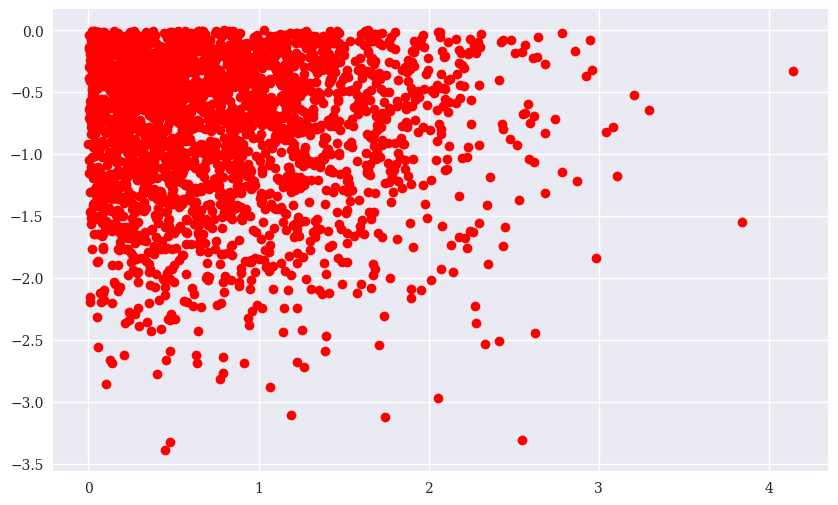

In [98]:
res = res[::100]
plt.figure(figsize=(10,6))
plt.plot(res[:,0], res[:,1],'ro')

Figure 9-1. Scatter plot of the query result (selection)

In [99]:
%time data = pd.read_sql('SELECT * FROM numbers',con)
# reads all the rows of the table into the DataFrame object named data

CPU times: user 456 ms, sys: 51.8 ms, total: 508 ms
Wall time: 512 ms


In [100]:
data.head()

,No1,No2,No3,No4,No5
0,0.4918,1.3707,0.1370,0.3981,-1.0059
1,0.4516,1.4445,0.0555,-0.0397,0.4400
2,0.1629,-0.8473,-0.8223,-0.4621,-0.5137
3,1.3064,0.9125,0.5142,-0.7868,-0.3398
4,-0.1148,-1.5215,-0.7045,-1.0042,-0.0600


In [101]:
%time data[(data['No1']>0)&(data['No2']<0).head()]

CPU times: user 36.9 ms, sys: 2.76 ms, total: 39.6 ms
Wall time: 39.1 ms


,No1,No2,No3,No4,No5
2,0.1629,-0.8473,-0.8223,-0.4621,-0.5137


In [102]:
%%time
q = '(No1<-0.5|No1>0.5)&(No2<-1|No2>1)'
res = data[['No1', 'No2']].query(q)

CPU times: user 11.5 ms, sys: 2.49 ms, total: 14 ms
Wall time: 5.31 ms


In [104]:
h5s = pd.HDFStore(filename + '.h5s', 'w')

ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.